# NAT Meter stats

In [1]:
import requests
from datetime import datetime
%matplotlib inline

In [2]:
CHARTS_ASPECT = (15, 5)
XAXIS_FORMAT = '%m-%Y'
SINCE = datetime.strptime("2018-07-01", "%Y-%m-%d")

In [3]:
answers = {}

In [4]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import timedelta
from collections import defaultdict

def plot(x, y, title="", xlabel="Date (mm-yyyy)", ylabel="", boxlabels=["1 day", "30 day aggregate"], delta=30):
    
    plt.figure(figsize=CHARTS_ASPECT)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(XAXIS_FORMAT))
    xticks = list(set([_.replace(day=1, hour=0, minute=0, second=0, microsecond=0) for _ in x]))  # truncated dates --> (y,m,d)
    
    plt.plot_date(
        x, y,
        color=plt.get_cmap('Reds')(200), # TODO linestyle='solid'
        label=boxlabels[0] if type(boxlabels)==list else boxlabels
    )
    
    if delta:
        _y = defaultdict(int)
        for d,c in zip(x,y):
            _ = [_c for _d,_c in zip(x,y) if d>_d>d-timedelta(days=delta)]
            if len(_)>0:
                s = 1.0*sum(_) / len(_)
            else:
                s = 0.0
            _y[d] = s

        plt.plot_date(
            _y.keys(), _y.values(),
            color=plt.get_cmap('Blues')(200), # TODO linestyle='solid'
            label=boxlabels[1] if type(boxlabels)==list else boxlabels
        )
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.grid(linestyle='dotted')
    plt.xticks(xticks, rotation=30)
    
    plt.legend()
    
    plt.show()
    
BASE_URL = "https://natmeter.labs.lacnic.net/reports"
# BASE_URL = "http://127.0.0.1:8000/reports"

# global var answers

def fetch(url):
    
    if url in answers.keys():
        print url
        return answers.get(url)
    
    _dict = {}
    
    response = requests.get(BASE_URL + url)
    print response
    entries = response.text.split("\n")
    for e in entries:
        if "," in e:
            k,v = e.split(",")
            date = datetime.strptime(k, '%Y-%m-%d')
            if date < SINCE:
                continue
            _dict[date] = int(v)
    
    answers[url] = _dict
    return _dict

## Measurement level

### Dualstack count

<Response [200]>


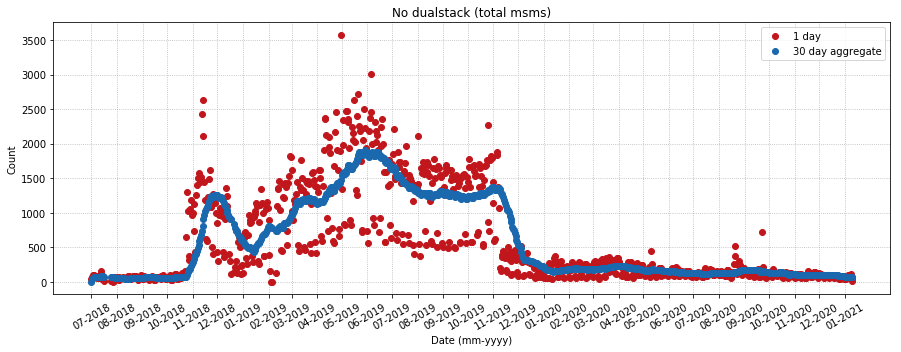

<Response [200]>


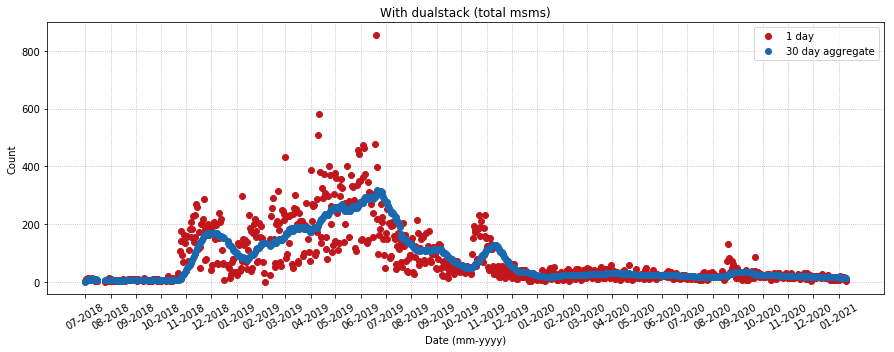

In [5]:
urls = ["/dualstack_false", "/dualstack_true"]
titles = ["No dualstack (total msms)", "With dualstack (total msms)"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

### Dualstack ratio

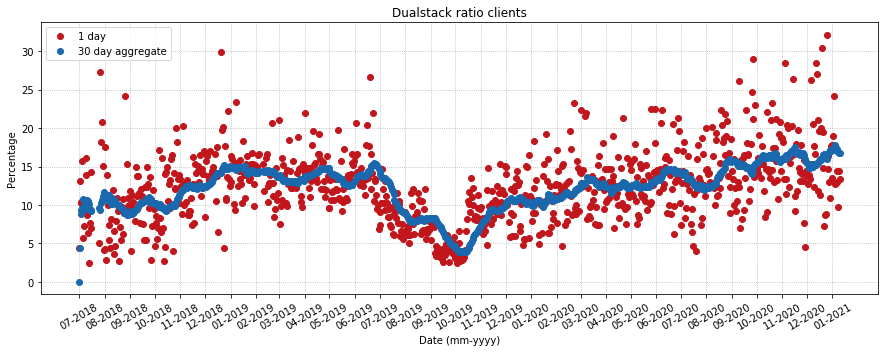

In [6]:
chart = {}

for k,v in answers["/dualstack_true"].items():
    ratio = 100.0*v / (answers["/dualstack_false"][k] + v)
    chart[k] = ratio

plot(
    chart.keys(), chart.values(), title="Dualstack ratio clients", ylabel="Percentage"
)

### NAT (any) count

<Response [200]>


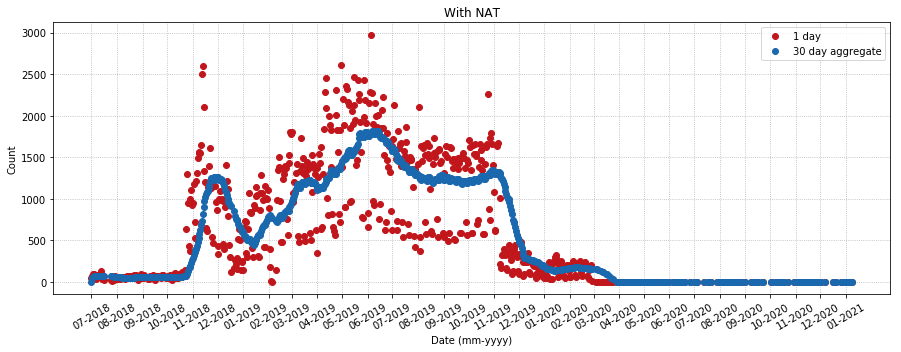

<Response [200]>


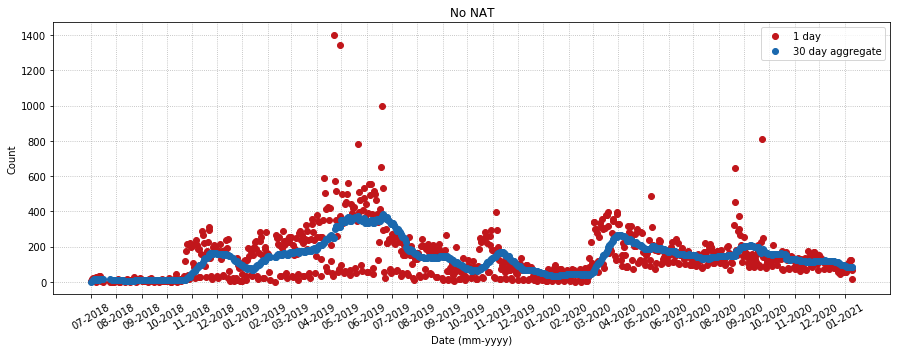

In [7]:
# plotting
urls = ["/nat_free_0_false", "/nat_free_0_true"]
titles = ["With NAT", "No NAT"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

### NAT (any) ratio

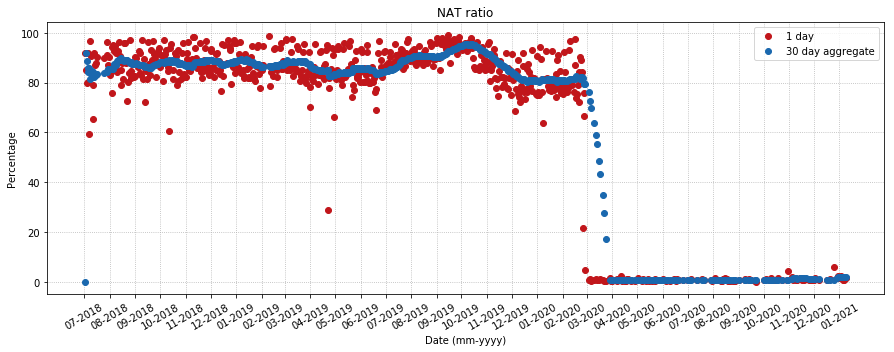

In [8]:
chart = {}

for k,v in answers["/nat_free_0_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_0_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT ratio", ylabel="Percentage"
)

### NAT 66

<Response [200]>


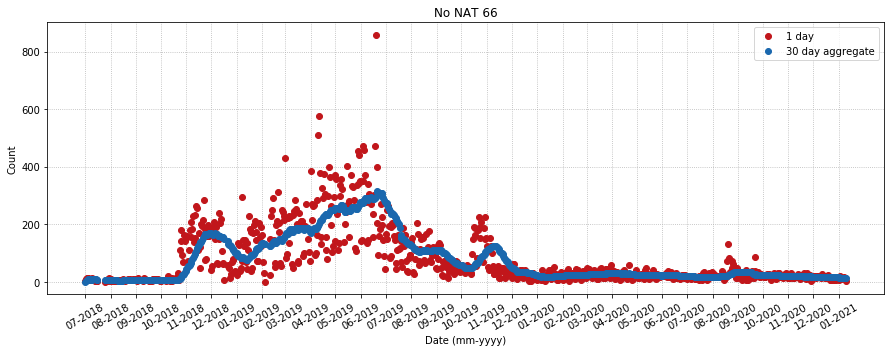

<Response [200]>


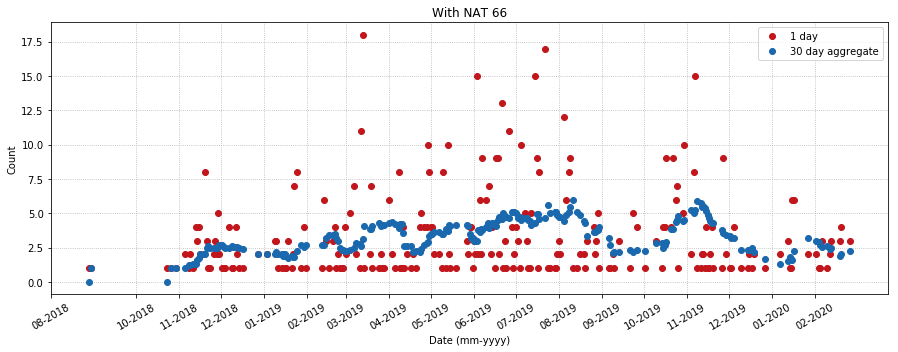

In [9]:
# plotting
urls = ["/nat_free_6_true", "/nat_free_6_false"]
titles = ["No NAT 66", "With NAT 66"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

### NAT 66 ratio

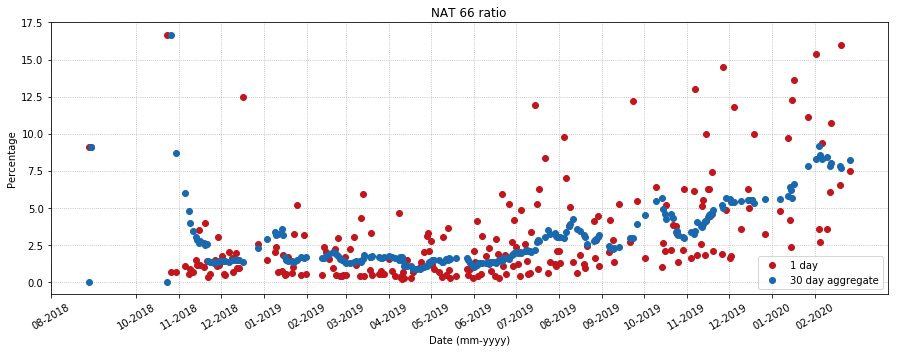

In [10]:
chart = {}

for k,v in answers["/nat_free_6_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_6_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT 66 ratio", ylabel="Percentage"
)

### No NAT 66

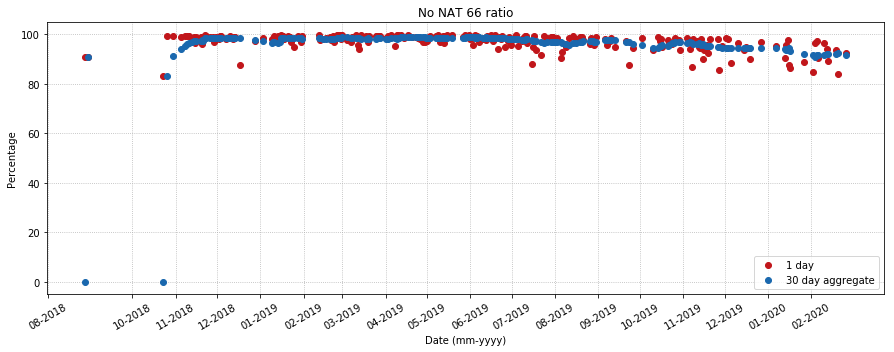

In [11]:
chart = {}

for k,v in answers["/nat_free_6_true"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_6_false"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="No NAT 66 ratio", ylabel="Percentage"
)

### NAT 44 count

<Response [200]>


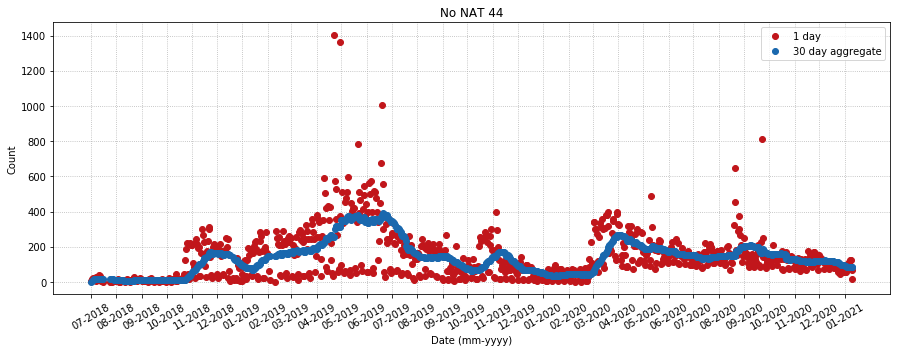

<Response [200]>


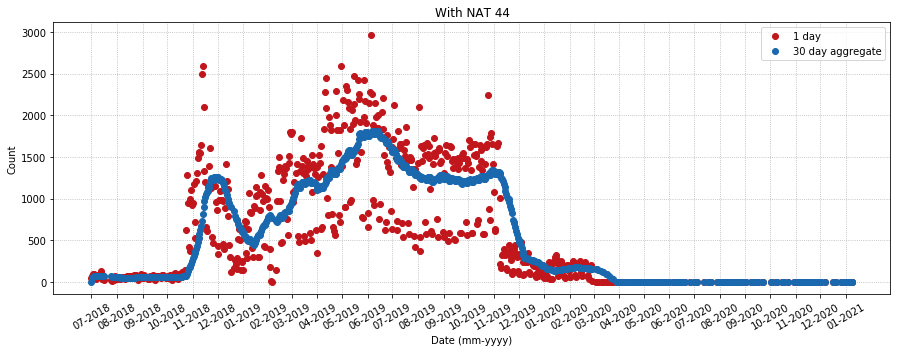

In [12]:
# plotting
urls = ["/nat_free_4_true", "/nat_free_4_false"]
titles = ["No NAT 44", "With NAT 44"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

### NAT 44 ratio

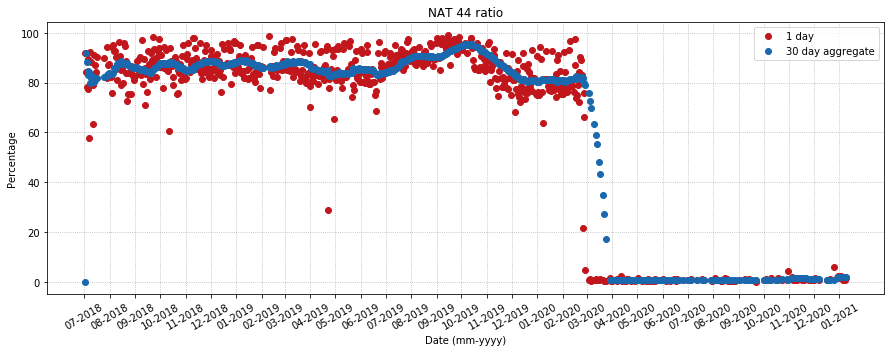

In [13]:
chart = {}

for k,v in answers["/nat_free_4_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_4_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT 44 ratio", ylabel="Percentage"
)

### No NAT 44 ratio

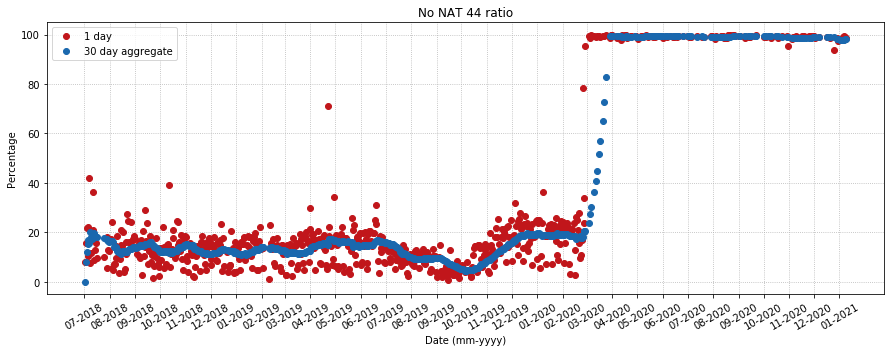

In [14]:
chart = {}

for k,v in answers["/nat_free_4_true"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_4_false"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="No NAT 44 ratio", ylabel="Percentage"
)

### v6-only

<Response [200]>


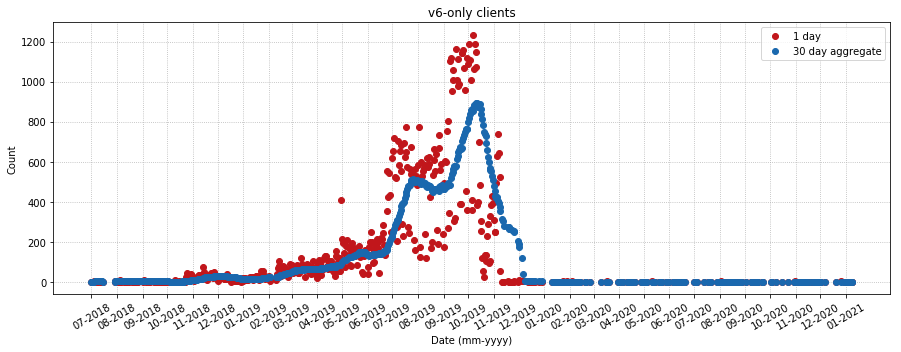

<Response [200]>


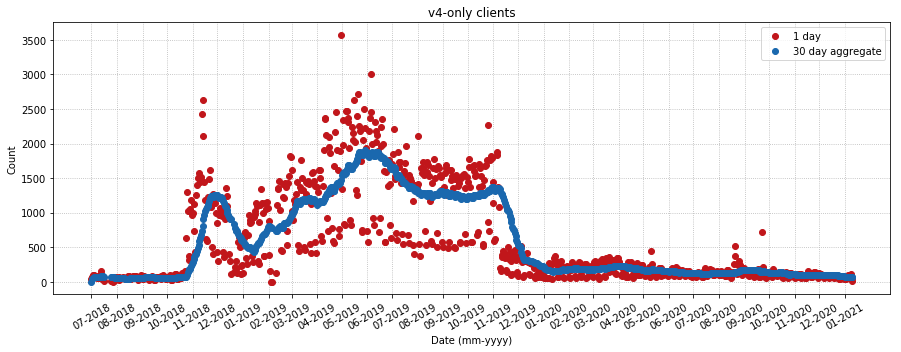

/dualstack_true


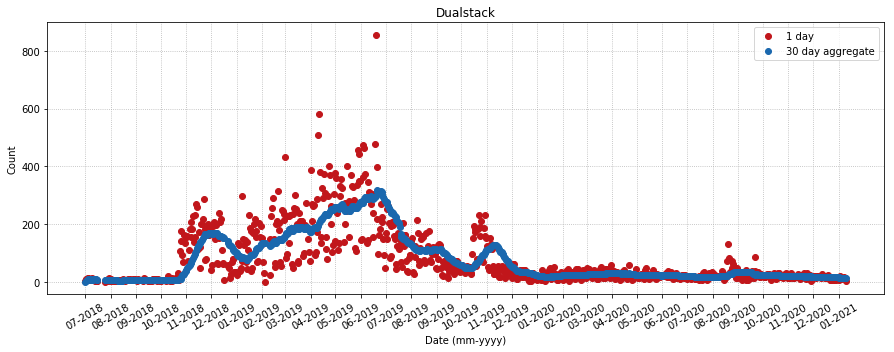

In [15]:
# plotting
urls = ["/v6_only", "/v4_only", "/dualstack_true"]
titles = ["v6-only clients", "v4-only clients", "Dualstack"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

### v6-only ratio

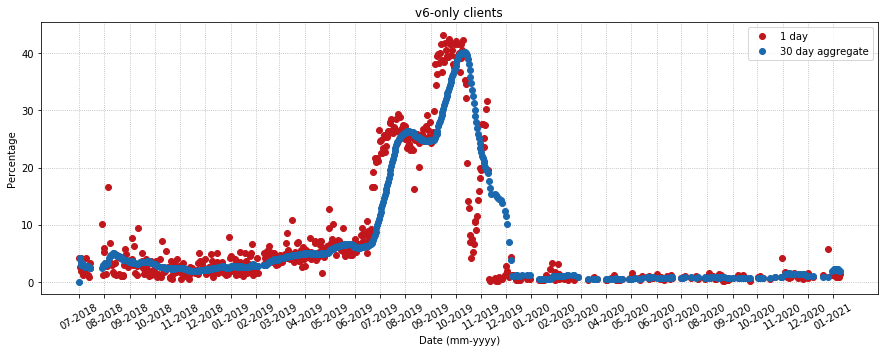

In [16]:
chart = {}

for k,v in answers["/v6_only"].items():
    try:
        ratio = 100.0*v / (answers["/v4_only"][k] + answers["/dualstack_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="v6-only clients", ylabel="Percentage"
)

### v4-only

v4 only should go downwards

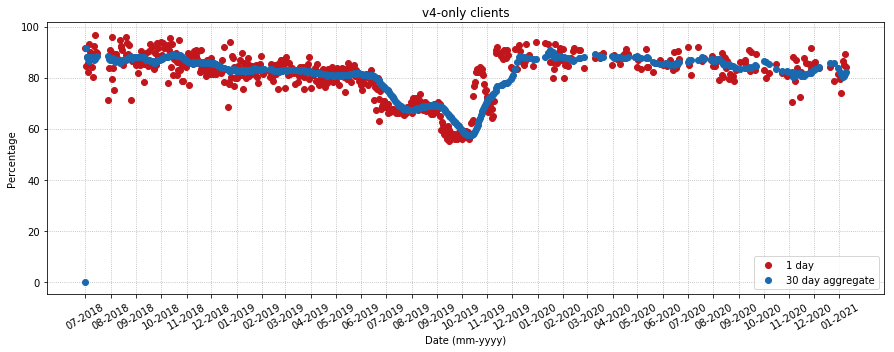

In [17]:
chart = {}

for k,v in answers["/v4_only"].items():
    try:
        ratio = 100.0*v / (answers["/v6_only"][k] + answers["/dualstack_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="v4-only clients", ylabel="Percentage"
)

# mDNS implementation: impact on msm creation

<Response [200]>


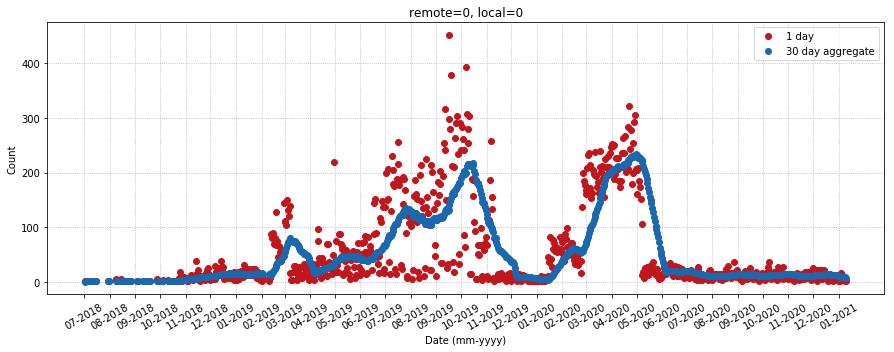

<Response [200]>


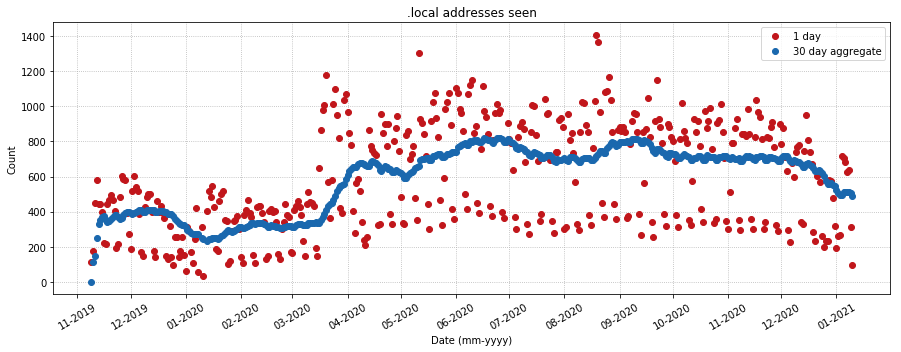

<Response [200]>


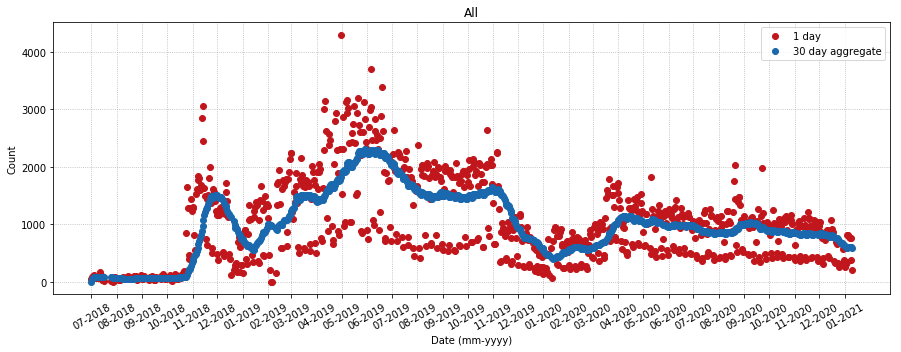

In [18]:
# plotting
urls = ["/remote_local_0", "/dotlocal_ips__gt_0", "/all"]
titles = ["remote=0, local=0", ".local addresses seen", "All"]

for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )


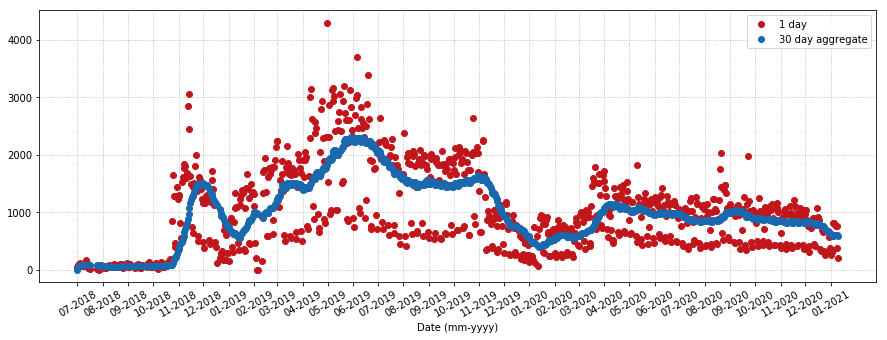

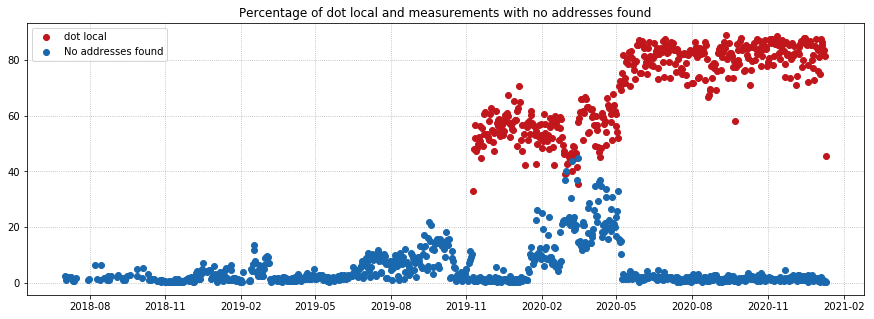

In [19]:
plot(
    answers["/all"].keys(), answers["/all"].values()
)


plt.figure(figsize=CHARTS_ASPECT)

timeseries = answers["/dotlocal_ips__gt_0"]
plt.plot_date(
        timeseries.keys(), [100.0*v/answers["/all"].get(k,1e6) for k,v in timeseries.items()],
        color=plt.get_cmap('Reds')(200), # TODO linestyle='solid'
        label="dot local"
    )

timeseries = answers["/remote_local_0"]
plt.plot_date(
        timeseries.keys(), [100.0*v/answers["/all"].get(k,1e6) for k,v in timeseries.items()],
        color=plt.get_cmap('Blues')(200), # TODO linestyle='solid'
        label="No addresses found"
    )


plt.grid(linestyle='dotted')

plt.title("Percentage of dot local and measurements with no addresses found")
plt.legend()

plt.show()

## Network diversity: how many prefixes and ASNs are we reaching?

In [ ]:
# url = "https://natmeter.labs.lacnic.net/static/results.csv"
url = "http://127.0.0.1:8000/static/results.csv"

In [ ]:
response = requests.get(url)

In [ ]:
import json
from collections import Counter, defaultdict
from datetime import timedelta

dates = []
entries = response.text.split("\n")
date2pfxs = defaultdict(list)
date2asns = defaultdict(list)
date2ua = defaultdict(list)

for e in entries:
    if '#' in e or '\n' == e or '\r' == e:
        continue
    
    # headers
    if '[' not in e:
        continue
    
    e = e.replace('\'', '')
    
    private, public, asns, user_agent, date = e.split('\t')
    private = private.replace('[', '').replace(']', '').decode('utf-8').split(', ')
    public = public.replace('[', '').replace(']', '').decode('utf-8').split(', ')
    asns = asns.replace('[', '').replace(']', '').decode('utf-8').split(', ')
    date = date.replace('\r', '')

    date = datetime.strptime(date, '%Y-%m-%d')
    
    if date < SINCE:
        continue
    
    dates.append(date)
    date2pfxs[date] += public
    date2asns[date] += asns
    date2ua[date].append(user_agent)
    

### Unique prefix count

In [ ]:
start = min(date2pfxs.keys())
end = max(date2pfxs.keys())

current = start
delta = timedelta(days=1)

timeseries = defaultdict(datetime)
while current <= end:
    w_pfxs = [p for d,p in date2pfxs.items() if current-delta < d <= current]
    w_pfxs = [item for sublist in w_pfxs for item in sublist]

    w_unique_pfxs = len(set(Counter(w_pfxs)))
    timeseries[current] = w_unique_pfxs
    
    current += timedelta(days=1)

In [ ]:
plot(
    timeseries.keys(),
    timeseries.values(),
    title="Unique public prefixes",
    ylabel="Unique public prefix count \n (window=90d)",
#     boxlabels="",
    delta=30
)

### Unique ASN count

In [ ]:
start = min(date2asns.keys())
end = max(date2asns.keys())

current = start
delta = timedelta(days=1)

timeseries = defaultdict(datetime)
while current <= end:
    w_pfxs = [p for d,p in date2asns.items() if current-delta < d <= current]
    w_pfxs = [item for sublist in w_pfxs for item in sublist]

    w_unique_pfxs = len(set(Counter(w_pfxs)))
    timeseries[current] = w_unique_pfxs
    
    current += timedelta(days=1)

In [ ]:
plot(
    timeseries.keys(),
    timeseries.values(),
    title="Unique ASN count",
    ylabel="Unique ASN count \n (window=90d)",
#     boxlabels="",
    delta=30
)

In [ ]:
from user_agents import parse

entries = response.text.split("\n")
date2nat = defaultdict(list)
date2nonat = defaultdict(list)

date2ua = defaultdict(list)
ua2nat = defaultdict(list)

stats = {
    'nat':0,
    'no-nat':0
}

for e in entries:
    if '#' in e or '\n' == e or '\r' == e:
        continue
    
    # headers
    if '[' not in e:
        continue
    
    e = e.replace('\'', '')
    
    private, public, asns, user_agent, date = e.split('\t')
    private = [pfx for pfx in private.replace('[', '').replace(']', '').decode('utf-8').split(', ') if pfx!='']
    public = [pfx for pfx in public.replace('[', '').replace(']', '').decode('utf-8').split(', ') if pfx!='']
    asns = [int(asn) for asn in asns.replace('[', '').replace(']', '').decode('utf-8').split(', ') if asn!='']
    date = date.replace('\r', '')
    
    date = datetime.strptime(date, '%Y-%m-%d')
    
    if date < SINCE:
        continue
    
    if len(asns)==0:
        continue
        
    if len(private) == 0 and len(public) > 0 or \
       len(private) == 0 and len(public) == 0:
        continue
    
    # Browsers
    ua = parse(user_agent)
    MAJOR = 0
    if ua.browser.family and ua.browser.version:
        browser_string = ','.join([ua.browser.family, str(ua.browser.version[MAJOR])])
    elif ua.browser.family:
        browser_string = ua.browser.family
    date2ua[date].append(browser_string)
        
        

    if len(private)>0 and len(public)>0:
        stats['nat'] += 1
        date2nat[date] += asns
        ua2nat[browser_string].append(1)
    else:
        stats['no-nat'] += 1
        date2nonat[date] += asns
        ua2nat[browser_string].append(0)
        

In [ ]:
browsers = []
nats = []
for browser, nat_list in ua2nat.items():
    browsers.append(browser)
    nats.append(1.0*sum(nat_list)/len(nat_list))

plt.scatter(
    browsers, nats
)
plt.show()


In [ ]:
browser_ranking = Counter([b for l in date2ua.values() for b in l])
browser_universe = set(browser_ranking.keys())

In [ ]:
browser_ranking.most_common(30)

In [ ]:
browsers2timelines = defaultdict(list)

for date, browsers in sorted(date2ua.items()):
    counter = Counter(browsers)

    for b in browser_universe:
        browsers2timelines[b].append(
            100.0*counter.get(b, 0)/sum(counter.values())
        )

In [ ]:
from random import randint

plt.figure(figsize=CHARTS_ASPECT)

browser_timelines = [v for k,v in browsers2timelines.items() if 'Chrome' in k and 'Mobile' not in k]

# TOP = 30
# top_browsers = [b[0] for b in browser_ranking.most_common(TOP)]
# browser_timelines = [browsers2timelines[b] for b in top_browsers]

#global mutex
def color(ua):
    global i
    
    if 'Mobile' in ua:
        cmap = plt.cm.Blues
    elif 'Headless' in ua:
        cmap = plt.cm.Oranges
    else:
        cmap = plt.cm.Reds
    if i:
        n = 200
    else:
        n = 120
        
    i = not i
    
    return cmap(n)
i = False
    
plt.stackplot(
    sorted(date2ua.keys()),
    browser_timelines,
    colors=[color(k) for k,v in browsers2timelines.items() if 'Chrome' in k and 'Mobile' not in k],
)

# plt.legend(
#     [k for k,v in browsers2timelines.items() if 'Chrome' in k]
# )
plt.show()

In [ ]:
plt.figure(figsize=CHARTS_ASPECT)

timeseries = answers["/dotlocal_ips__gt_0"]
plt.plot_date(
        timeseries.keys(), [100.0*v/answers["/all"].get(k,1e6) for k,v in timeseries.items()],
        color=plt.get_cmap('Reds')(200), # TODO linestyle='solid'
        label="dot local"
    )

timeseries = answers["/remote_local_0"]
plt.plot_date(
        timeseries.keys(), [100.0*v/answers["/all"].get(k,1e6) for k,v in timeseries.items()],
        color=plt.get_cmap('Blues')(200), # TODO linestyle='solid'
        label="No addresses found"
    )


plt.stackplot(
    sorted(date2ua.keys()),
    browser_timelines,
    alpha=.3
)

plt.show()

In [ ]:
[sum(b) for b in browser_timelines]

### Measurements

In [ ]:
100.0*stats['nat'] / (stats['nat']+stats['no-nat'])

### ASNs

In [ ]:
networks_natted = set([i for l in date2nat.values() for i in l])
networks_not_natted = set([i for l in date2nonat.values() for i in l])

In [ ]:
100.0*len(networks_natted) / (len(networks_natted)+len(networks_not_natted))

In [ ]:
len(networks_natted.intersection(networks_not_natted))

In [ ]:
len(networks_natted.difference(networks_not_natted))

In [ ]:
len(networks_not_natted.difference(networks_natted))

## ASN count

In [ ]:
delta = timedelta(days=7)
plot_delta=90

_boxlabels=["%s day" % delta.days, "%s day avg." % plot_delta]

In [ ]:
start = min(date2nat.keys())
end = max(date2nat.keys())

current = start

timeseries = defaultdict(datetime)
while current <= end:
    w_pfxs = [p for d,p in date2nat.items() if current-delta < d <= current]
    w_pfxs = [item for sublist in w_pfxs for item in sublist]

    w_unique_pfxs = len(set(Counter(w_pfxs)))
    timeseries[current] = w_unique_pfxs
    
    current += delta

In [ ]:
plot(
    timeseries.keys(),
    timeseries.values(),
    title="Unique ASN count (Natted)",
    ylabel="Unique ASN count",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
start = min(date2nonat.keys())
end = max(date2nonat.keys())

current = start

timeseries = defaultdict(datetime)
while current <= end:
    w_pfxs = [p for d,p in date2nonat.items() if current-delta < d <= current]
    w_pfxs = [item for sublist in w_pfxs for item in sublist]

    w_unique_pfxs = len(set(Counter(w_pfxs)))
    timeseries[current] = w_unique_pfxs
    
    current += delta

In [ ]:
plot(
    timeseries.keys(),
    timeseries.values(),
    title="Unique ASN count (Not natted)",
    ylabel="Unique ASN count",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
start = min(date2ua.keys())
end = max(date2ua.keys())

current = start

timeseries = defaultdict(datetime)
while current <= end:
    w_pfxs = [p for d,p in date2ua.items() if current-delta < d <= current]
    w_pfxs = [item for sublist in w_pfxs for item in sublist]

    w_unique_pfxs = len(set(Counter(w_pfxs)))
    timeseries[current] = w_unique_pfxs
    
    current += delta

In [ ]:
plot(
    timeseries.keys(),
    timeseries.values(),
    title="Unique User Agent strings",
    ylabel="Unique User Agent strings",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
dates = set(date2nat.keys()).intersection(set(date2nonat.keys()))
start = min(dates)
end = max(dates)

current = start

timeseries_natted_ratio = defaultdict(datetime)
timeseries_asns_doing_both = defaultdict(datetime)  # ASNs doing nat and no-nat
timeseries_asns_doing_nonat_only = defaultdict(datetime)  # ASNs doing nat and no-nat
timeseries_asns_doing_nat_only = defaultdict(datetime)  # ASNs doing nat and no-nat

while current <= end:
    natted_asns = [p for d,p in date2nat.items() if current-delta < d <= current]
    natted_asns = [item for sublist in natted_asns for item in sublist]
    natted_asns = set(Counter(natted_asns))
    
    not_natted_asns = [p for d,p in date2nonat.items() if current-delta < d <= current]
    not_natted_asns = [item for sublist in not_natted_asns for item in sublist]
    not_natted_asns = set(Counter(not_natted_asns))

    total_asns = len(natted_asns) + len(not_natted_asns)
    natted_ratio = 1.0*len(natted_asns) / total_asns if total_asns else .0
    
    timeseries_asns_doing_both[current] = len(natted_asns.intersection(not_natted_asns))
    timeseries_asns_doing_nonat_only[current] = len(not_natted_asns.difference(natted_asns))
    timeseries_asns_doing_nat_only[current] = len(natted_asns.difference(not_natted_asns))
    timeseries_natted_ratio[current] = natted_ratio
    
    current += delta

In [ ]:
plot(
    timeseries_asns_doing_both.keys(),
    timeseries_asns_doing_both.values(),
    title="ASNs showing up with natted *and* not natted prefixes (inside the same 90d time window)",
    ylabel="Unique ASN count",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
plot(
    timeseries_asns_doing_nonat_only.keys(),
    timeseries_asns_doing_nonat_only.values(),
    title="ASNs showing up with no NAT",
    ylabel="Unique ASN count",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
plot(
    timeseries_asns_doing_nat_only.keys(),
    timeseries_asns_doing_nat_only.values(),
    title="ASNs showing up only behind NAT",
    ylabel="Unique ASN count",
    boxlabels=_boxlabels,
    delta=plot_delta
)

In [ ]:
timeseries_asns_doing_both_normed = defaultdict(float)
timeseries_asns_doing_nonat_only_normed = defaultdict(float)
timeseries_asns_doing_nat_only_normed = defaultdict(float)


for date in sorted(timeseries_asns_doing_both.keys()):
    a = timeseries_asns_doing_both[date]
    b = timeseries_asns_doing_nonat_only[date]
    c = timeseries_asns_doing_nat_only[date]
    
    total = a+b+c
    timeseries_asns_doing_both_normed[date] = 100.0*a / total if total else .0
    timeseries_asns_doing_nonat_only_normed[date] = 100.0*b / total if total else .0
    timeseries_asns_doing_nat_only_normed[date] = 100.0*c / total if total else .0
    
plt.figure(figsize=CHARTS_ASPECT)

plt.stackplot(
    sorted(timeseries_asns_doing_nat_only_normed),
    [v for k,v in sorted(timeseries_asns_doing_both_normed.items())],
    [v for k,v in sorted(timeseries_asns_doing_nonat_only_normed.items())],
    [v for k,v in sorted(timeseries_asns_doing_nat_only_normed.items())],
    
    labels=["Both", "No NAT", "NAT only"],
    colors=["#1764AB", "#FFE07F", "#F43333"]
)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(XAXIS_FORMAT))
plt.xticks(list(set(
    [
        _.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
        for _ in sorted(timeseries_asns_doing_nat_only_normed.keys())
    ]
)), rotation=30
          )

plt.ylabel("Percentage")
plt.title("The good, the bad, and the ugly: \n Unique ASNs seen on a %dd time window" % delta.days)

plt.grid(linestyle='dotted')
plt.legend()
plt.show()
